# Image Classification with deep neural networks

In [1]:
from tensorflow.keras import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(xtrain,ytrain),(xtest,ytest) = datasets.fashion_mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
cnames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

9 Ankle boot


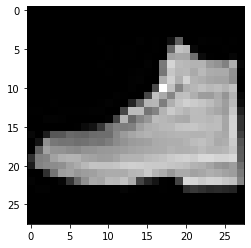

In [15]:
ind=50000
print(ytrain[ind],cnames[ytrain[ind]])
plt.imshow(xtrain[ind],cmap='gray')
plt.show()

### Data processing

In [16]:
# scale the images
xtrain = xtrain/255
xtest = xtest/255

In [17]:
# onehot encode the labels
print(ytrain.shape)
print(ytest.shape)
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000,)
(10000,)
(60000, 10)
(10000, 10)


## Modelling the Deep Neural Network

In [18]:
from tensorflow.keras import models,layers

In [21]:
# the input layer
input_layer = layers.Input(shape=(28,28))

# flatten layer - will convert data from 28x28 to 1x784
ft = layers.Flatten()(input_layer)

# first hidden layer
h1 = layers.Dense(200,activation='relu')(ft)

# second hidden layer
h2 = layers.Dense(100,activation='relu')(h1)

# third hidden layer
h3 = layers.Dense(50,activation = 'relu')(h2)

# add the output layer
op = layers.Dense(10,activation='softmax')(h3)

model = models.Model(inputs=input_layer,outputs=op,name='mnist_classifier')
model.summary()

Model: "mnist_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
____________________________________________

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=1000,validation_data=(xtest,ytest))

Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3262 - accuracy: 0.8839 - val_loss: 0.3434 - val_accuracy: 0.8793
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2805 - accuracy: 0.8980 - val_loss: 0.3502 - val_accuracy: 0.8782
Epoch 3/10
60/60 [==============================] - 1s 11ms/step - loss: 0.2707 - accuracy: 0.9010 - val_loss: 0.3471 - val_accuracy: 0.8760
Epoch 4/10
60/60 [==============================] - 1s 11ms/step - loss: 0.2655 - accuracy: 0.9042 - val_loss: 0.3457 - val_accuracy: 0.8775
Epoch 5/10
60/60 [==============================] - 1s 11ms/step - loss: 0.2616 - accuracy: 0.9046 - val_loss: 0.3452 - val_accuracy: 0.8765
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2476 - accuracy: 0.9100 - val_loss: 0.3356 - val_accuracy: 0.8813
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2453 - accuracy: 0.9087 - val_loss: 0.3336 - val_accuracy: 0.8838
Epoch 8/10
60

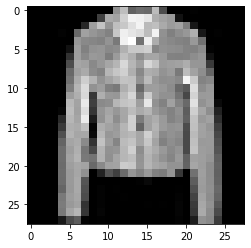

In [31]:
plt.imshow(xtest[10],cmap='gray')
plt.show()

In [32]:
pred = model.predict(xtest[10].reshape(1,28,28))
pred

array([[5.4641368e-06, 1.1279950e-06, 1.4572138e-02, 5.7102789e-06,
        9.8077184e-01, 6.5107102e-08, 4.6311151e-03, 9.7646407e-08,
        9.0476951e-06, 3.3634178e-06]], dtype=float32)

In [29]:
pred = np.argmax(pred)
cnames[pred]

'Coat'